In [5]:
import pandas as pd
import numpy as np

#for Box-Cox transformation
from scipy import stats

from mlxtend.preprocessing import minmax_scaling

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
kickstarters_2017 = pd.read_csv("ks-projects-201801.csv")
np.random.seed(0)

In [3]:
kickstarters_2017.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


# Scaling
Scaling means that transforming data fits within a specific scale, like 0-100 or 0-1

Text(0.5,1,'Scaled Data')

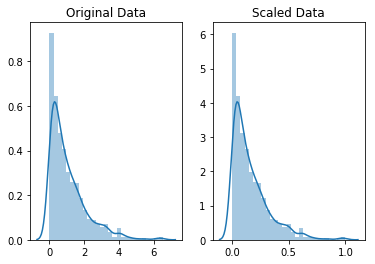

In [6]:
#generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size=1000)

#min-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns= [0])

#plot bot together to compare
fig,ax= plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled Data")


Shape of the data doesn't change, but instead of ranging from 0 to 8ish, it now ranges from 0 to 1.

# Normalization
The point of normalization is to change your observations so that they can be described as a normal distribution.  
In general, we normalize data if we going to be using a machine learning or statistics technique that assumes your  
data is normally distributed.(t-tests, ANOVAs, linear regression, linear discriminant analysis, gaussian naive bayes)

Text(0.5,1,'Normalized Data')

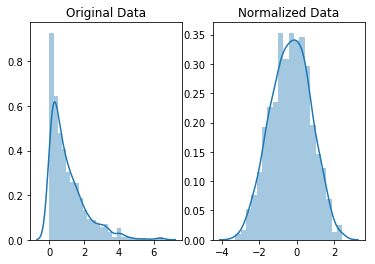

In [7]:
#normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

#plot both together to compare
fig,ax = plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized Data")

# Practice scaling

Text(0.5,1,'Scaled Data')

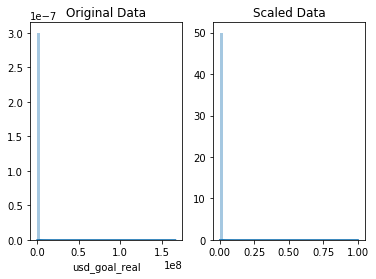

In [8]:
# usd_goal_real column
usd_goal = kickstarters_2017.usd_goal_real
#scaling the goal from 0 to 1
scaled_data = minmax_scaling(usd_goal, columns=[0])

fig,ax = plt.subplots(1,2)
sns.distplot(kickstarters_2017.usd_goal_real,ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled Data")

Text(0.5,1,'Scaled Data')

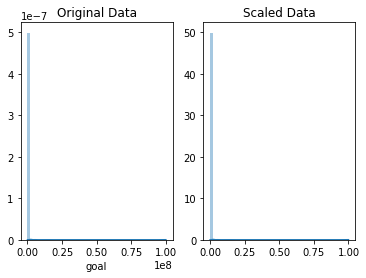

In [9]:
#goal column
goal = kickstarters_2017.goal
scaled_data = minmax_scaling(goal, columns=[0])

fig,ax= plt.subplots(1,2)
sns.distplot(kickstarters_2017.goal, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled Data")

# Practice normalization


Text(0.5,1,'Normalized Data')

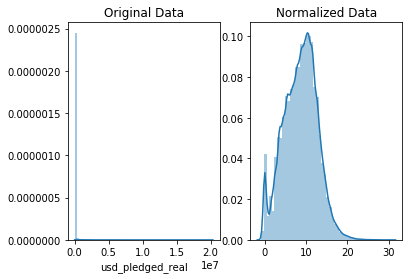

In [10]:
#get the index of all positive pledges(Box-Cox only takes positive values)
index_of_positive_pledges = kickstarters_2017.usd_pledged_real > 0

#get only positive pledges
positive_pledges = kickstarters_2017.usd_pledged_real.loc[index_of_positive_pledges]

#normalize the pledges
normalized_pledges = stats.boxcox(positive_pledges)[0]

#plot both together to compare
fig,ax =plt.subplots(1,2)
sns.distplot(positive_pledges,ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title("Normalized Data")
